In [114]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# Data Cleaning

In [3]:
df = pd.read_csv(r'C:\Users\GP SHIVA PRASAD\Downloads\Bank+Dataset\Bank Dataset\bank_marketing_updated_v1.csv',skiprows = 2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## dropping customerid (dropping columns)

In [4]:
df.drop('customerid',axis = 1,inplace = True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## splitting jobedu to job and edu (splitting columns)

In [5]:
df['job'] = df.jobedu.apply(lambda x: x.split(',')[0])
df['education'] = df.jobedu.apply(lambda x: x.split(',')[1])
df.drop('jobedu',axis = 1,inplace = True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### checking the dtype of a column and checking which entries are of different dtype for finding out

In [6]:
df[df.month.apply(lambda x : isinstance(x,float)) == True] # missing values made month float which should be str 

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


### checking missing values

In [7]:
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

#### finding out the % of missing values of columns 

In [8]:
(df.age.isnull().sum()/df.shape[0])*100

0.0442370219636814

#### dropping the rows having age value NaN

In [9]:
df = df[~df['age'].isnull()]
df.age.isnull().sum()
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


#### finding out the unique values in a column and finding out the % of those unique values in that column

In [10]:
df.month.value_counts() # this gives count of each unique value
(df.month.value_counts(normalize = True)*100).sort_values(ascending = False) # % age of each unique value in df.month
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


### Finding out the most occuring value in a column

In [11]:
df.month.mode()[0] # gives the more occuring value in a column
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


# imputing the missing value with the most occuring value in that column

In [12]:
df.month.fillna(df.month.mode()[0],inplace = True)
df.month.isnull().sum()
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


### Sometimes numerical values invalid values are made missing bcoz they don't interfere with mean,mode,median etc

In [13]:
df.pdays.describe()
df.pdays.isnull().sum()
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [14]:
# -1 here represents there is no previous contact, so they must be missed values bcoz -1 interfere with mean,mode,median
df.pdays.loc[df.pdays<0] = np.NaN
df.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

# Handling Outliers

In [15]:
df.age.describe() # there is a chance that there are no outliers bcoz mean and 50%(median) are almost equal
                  # this doesn't guarantee anything

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

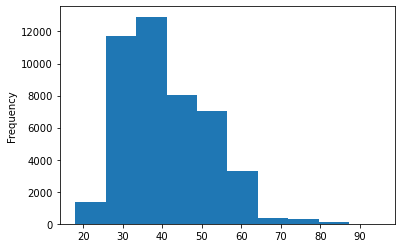

In [16]:
df.age.plot.hist()
plt.show() # not ideal but introduces how matplotlib inline commands work

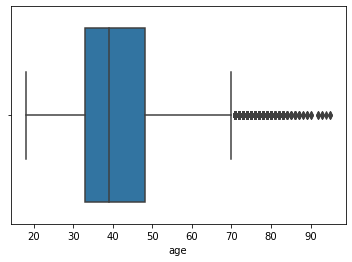

In [17]:
sns.boxplot(df.age) # the values are continous, so they cannot be called as outliers. Hence, No outliers
plt.show()

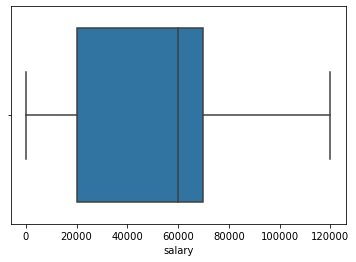

In [18]:
sns.boxplot(df.salary)

#### Balance Variable

In [19]:
df.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

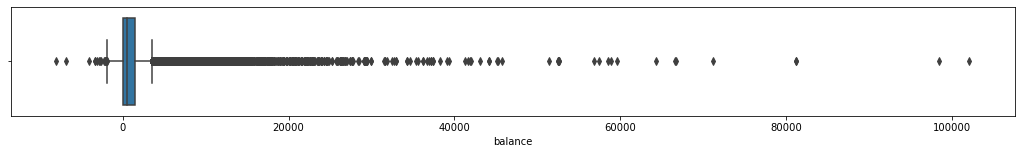

In [20]:
plt.figure(figsize =[18,2])
sns.boxplot(df.balance)
plt.show()

### To find Quantile

In [21]:
df.balance.quantile([0.5,0.7,0.9,0.95,0.99,1])

0.50       448.0
0.70      1126.0
0.90      3575.0
0.95      5768.0
0.99     13167.1
1.00    102127.0
Name: balance, dtype: float64

In [22]:
df[df.balance > 15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


## These values are relevant and have to be in analysis, we can't use mean, we use quantiles/ median / percentiles

#### This means that we dont use mean on this balance column, instead we use quantiles/ percentiles

### duration column contains entries in both sec and min. so converting every sec into min

In [23]:
df.duration = df.duration.apply(lambda x: float(x.split(' ')[0])/60 if x.count('sec')>0 else float(x.split(' ')[0]))
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.283333,3,NaN,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.600000,2,NaN,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.783333,5,184.0,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.466667,4,NaN,0,unknown,no,blue-collar,secondary


# Univariate Analysis

## Categorical Unordered data 

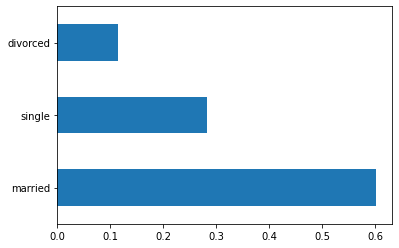

In [24]:
df.marital.value_counts(normalize = True).plot.barh() # matplotlib inline plotting barh = bar in horizontal

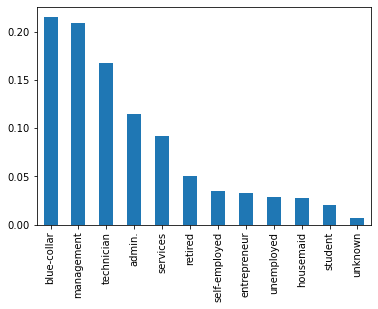

In [25]:
df.job.value_counts(normalize = True).plot.bar() # barh = horizontal, only bar = vertical, normalize gives the % of each category

### Categorical Ordered Dataset

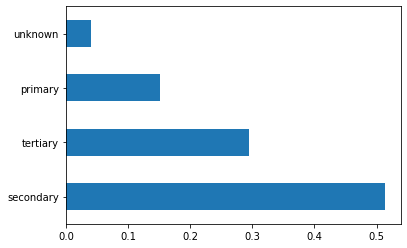

In [26]:
df.education.value_counts(normalize=True).plot.barh()

In [27]:
df.dtypes[df.dtypes == 'object']

marital      object
targeted     object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
response     object
job          object
education    object
dtype: object

In [28]:
df.education.value_counts() # gives the count of each category, value_counts(normalize = True) would give % of categories

secondary    23193
tertiary     13295
primary       6846
unknown       1857
Name: education, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

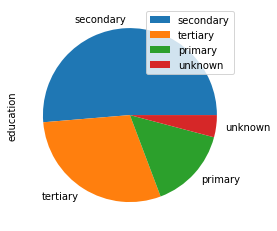

In [29]:
df.education.value_counts().plot.pie() 
plt.legend()
plt.show

## Previous outcome

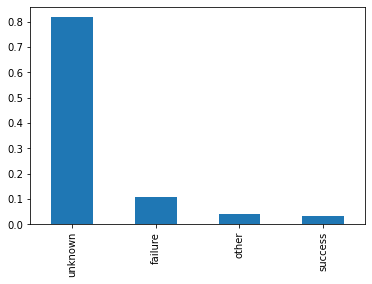

In [30]:
df.poutcome.value_counts(normalize = True).plot.bar()

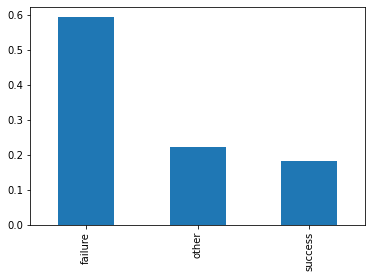

In [31]:
# ignoring unknown
df[df.poutcome != 'unknown'].poutcome.value_counts(normalize=True).plot.bar()

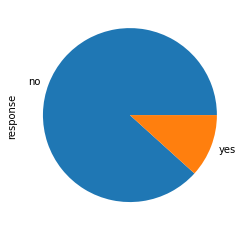

In [32]:
df.response.value_counts(normalize=True).plot.pie()

### Multi-variate / Bi-variate Analysis
#### Numeric - Numeric

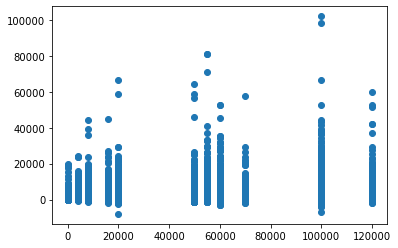

In [33]:
plt.scatter(df.salary,df.balance)
plt.show()

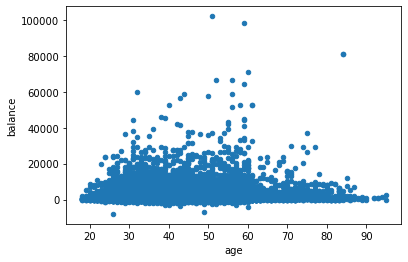

In [34]:
df.plot.scatter(x = 'age', y  = 'balance') # another way of scatter plot
plt.show()

#### Pair Plot 

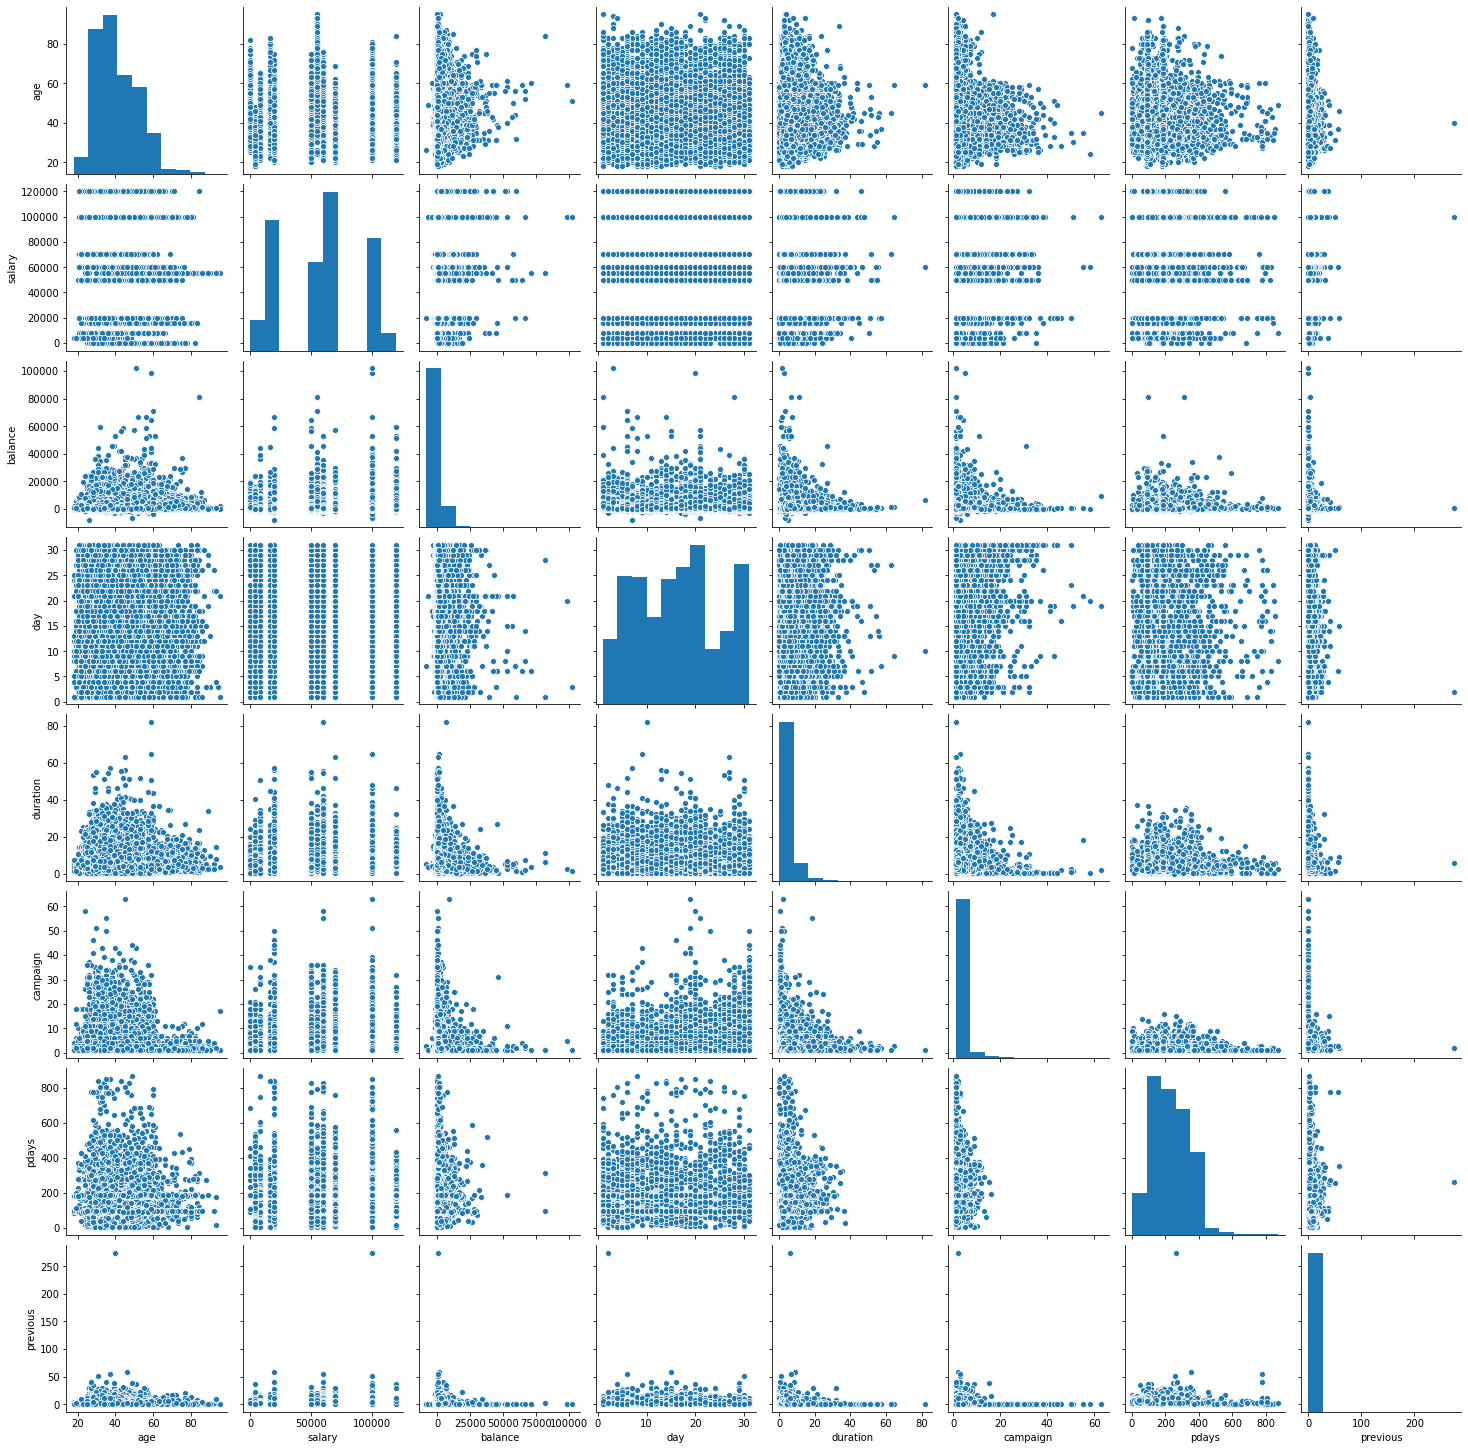

In [35]:
num = (df.columns[df.dtypes != 'object']) # gives the column names whose dtypes are not object (numeric)
sns.pairplot(data = df, vars = num)
plt.show()

#### Correlation Matrix

In [36]:
df[num].corr() # gives the correlation of all numeric columns

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024374,0.097755,-0.009184,-0.004658,0.004851,-0.107724,0.001330
salary,0.024374,1.000000,0.055505,0.027875,-0.009932,0.014902,-0.106849,0.014546
balance,0.097755,0.055505,1.000000,0.004501,0.021536,-0.014501,-0.108000,0.016704
day,-0.009184,0.027875,0.004501,1.000000,-0.030265,0.162426,-0.089888,-0.051620
duration,-0.004658,-0.009932,0.021536,-0.030265,1.000000,-0.084529,-0.024512,0.001174
campaign,0.004851,0.014902,-0.014501,0.162426,-0.084529,1.000000,0.050272,-0.032870
pdays,-0.107724,-0.106849,-0.108000,-0.089888,-0.024512,0.050272,1.000000,-0.023114
previous,0.001330,0.014546,0.016704,-0.051620,0.001174,-0.032870,-0.023114,1.000000


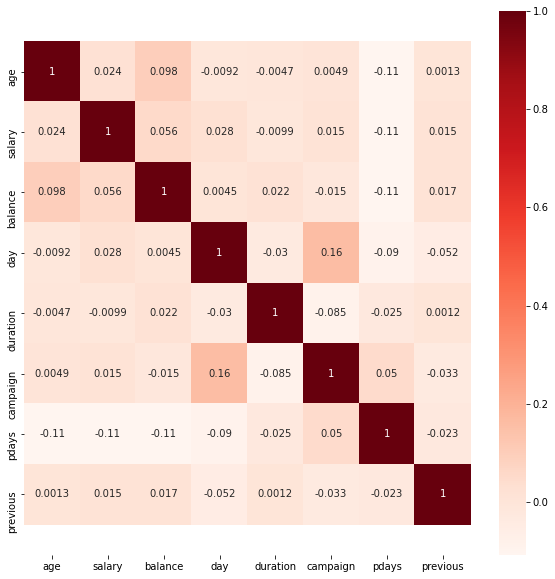

In [37]:
plt.figure(figsize=[10,10])
ax = sns.heatmap(df[num].corr(),annot=True,cmap = 'Reds')
bottom,top = ax.get_ylim() # get_ylim gives the y axis length and needed to be changed to get a clear visualization
ax.set_ylim(bottom+0.5,top-0.5) # set_ylim sets length to the required 
plt.show()

# Correlation Vs Causation

## There is no reason that if two variables had high correlation means they are dependent on each other / they cause each other
## Such relations are called "Spurious Relationships"

## Categorical - Numerical Analysis

In [38]:
df.groupby('response')['salary'].mean() # response column is Categorical(Yes/No)

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [39]:
df.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

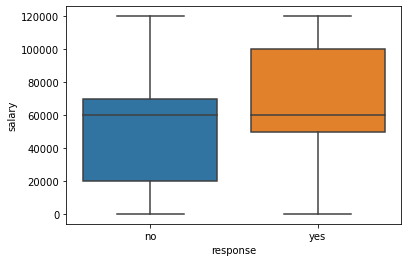

In [40]:
sns.boxplot(data = df, x ='response', y = 'salary') # this cleary shows that there are a huge chunk of people who said yes
                                                    # are having salary above 60000
plt.show()                                          # So, there is a relationship b/w salary and response

### Response Vs Balance
- We know that Balance is highly skewed ( means there is a high sd / contains very high numbers )

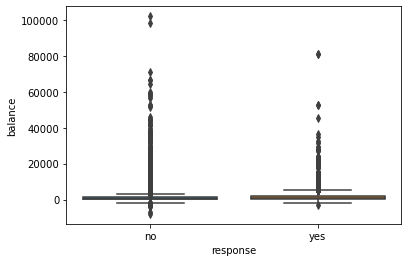

In [41]:
sns.boxplot(data = df, x = 'response', y = 'balance')
plt.show()

In [42]:
df.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [43]:
df.groupby('response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

In [44]:
df.groupby('response')['balance'].quantile([0.75,0.88,0.99,1])

response      
no        0.75     1341.25
          0.88     2934.00
          0.99    12840.50
          1.00    36935.00
yes       0.75     2103.00
          0.88     3754.00
          0.99    11866.00
          1.00    19268.00
Name: balance, dtype: float64

In [45]:
def p75(x):
    return np.quantile(x,0.75)  
df.groupby('response')['balance'].aggregate(['mean','median',p75])
# aggregate method can give more than one aggregation ( mean, median, mode, custom function ) etc

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

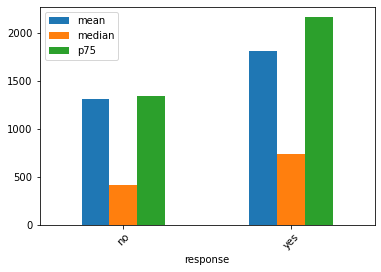

In [46]:
# we can plot graphs as well
df.groupby('response')['balance'].aggregate(['mean','median',p75]).plot.bar()
plt.xticks(rotation = 45)

In [47]:
df.groupby('education')['salary'].aggregate(['mean','median']).sort_values(by=['mean','median'])

,mean,median
education,,
primary,34224.510663,20000
unknown,46558.427571,50000
secondary,49736.127280,55000
tertiary,82878.300113,100000


### Categorical - Categorical Analysis

In [53]:
df['response_flag'] = np.where(df.response == 'yes',1,0)
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,Age_Group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary,0,>60
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary,0,>50
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0,>40
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0,>50
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown,0,>40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.283333,3,NaN,0,unknown,yes,technician,tertiary,1,>60
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.600000,2,NaN,0,unknown,yes,retired,primary,1,<60
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.783333,5,184.0,3,success,yes,retired,secondary,1,<60
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.466667,4,NaN,0,unknown,no,blue-collar,secondary,0,>60


#### response vs education

In [59]:
df.groupby('education')['response_flag'].mean().sort_values()

education
primary      0.086328
secondary    0.105549
unknown      0.135703
tertiary     0.149981
Name: response_flag, dtype: float64

### Marital Vs Response

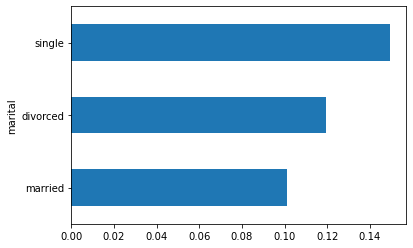

In [67]:
df.groupby('marital')['response_flag'].mean().sort_values().plot.barh()
plt.show()

### Loan vs Response

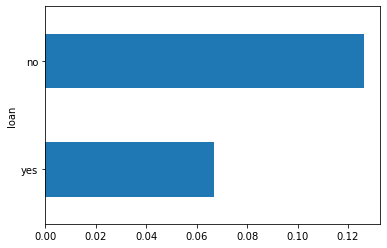

In [69]:
df.groupby('loan')['response_flag'].mean().sort_values().plot.barh()
plt.show()

### housing vs response

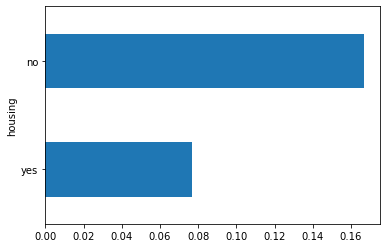

In [71]:
df.groupby('housing')['response_flag'].mean().sort_values().plot.barh()
plt.show()

### Age vs Response

In [76]:
df['Age_Group'] = pd.cut(df.age,[0,30,40,50,60,9999],labels =['0-30','30-40','40-50','50-60','<60']) # bucketing age column

In [77]:
(df.Age_Group.value_counts(normalize = True)*100).sort_values(ascending = False)

30-40    39.120621
40-50    24.861145
50-60    17.837623
0-30     15.551769
<60       2.628842
Name: Age_Group, dtype: float64

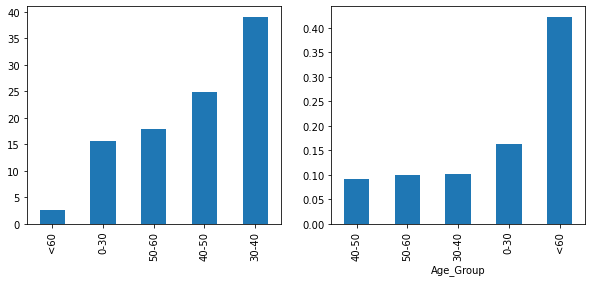

In [80]:
plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
(df.Age_Group.value_counts(normalize = True)*100).sort_values().plot.bar()
plt.subplot(1,2,2)
df.groupby('Age_Group')['response_flag'].mean().sort_values().plot.bar()
plt.show()

## Multivariate Analysis

#### Marriage & Education vs Response using pivot table

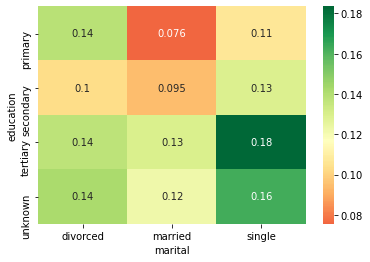

In [99]:
res = pd.pivot_table(data = df, index = 'education',columns = 'marital',values = 'response_flag')
sns.heatmap(res,annot = True,cmap = 'RdYlGn',center = 0.117) # cmap = color = Rd = Red, Yl = 'Yellow', 'Gn' = 'Green'
plt.show()                                                   # center will act like center for the range

### Job vs Marital Vs Response

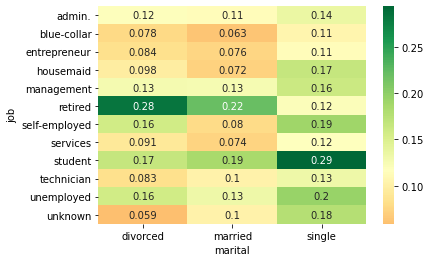

0.117

In [113]:
res = pd.pivot_table(data = df, index = 'job', columns = 'marital',values = 'response_flag')
sns.heatmap(res,annot= True, cmap = 'RdYlGn',center = 0.117)
plt.show()
# finding out the center 
round(df.response_flag.mean(),3)

## deleting unwanted data from columns

In [79]:
df.month.str.strip(',')

0        may, 2017
1        may, 2017
2        may, 2017
3        may, 2017
4        may, 2017
           ...    
45206    nov, 2017
45207    nov, 2017
45208    nov, 2017
45209    nov, 2017
45210    nov, 2017
Name: month, Length: 45191, dtype: object